In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
data = pd.DataFrame(ground_cricket_data)

In [103]:
print(data.shape)
data.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [104]:
data.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [105]:
data.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [106]:
data.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [107]:
data = data.drop_duplicates()

In [108]:
data.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [109]:
data['Chirps/Second']

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

In [110]:
iqr = data['Chirps/Second'].quantile(0.75) - data['Chirps/Second'].quantile(0.25)
upper_thresold = data['Chirps/Second'].quantile(0.75) + (1.5 * iqr)
lower_thresold = data['Chirps/Second'].quantile(0.25) - (1.5 * iqr)
lower_thresold, upper_thresold

(12.9, 19.699999999999996)

In [111]:
iqr = data['Ground Temperature'].quantile(0.75) - data['Ground Temperature'].quantile(0.25)
upper_thresold = data['Ground Temperature'].quantile(0.75) + (1.5 * iqr)
lower_thresold = data['Ground Temperature'].quantile(0.25) - (1.5 * iqr)
lower_thresold, upper_thresold

(58.400000000000006, 98.4)

In [112]:
# No Outliers

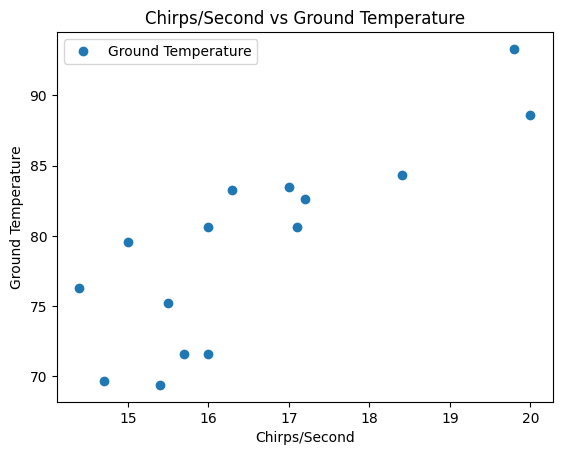

In [113]:
data.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [114]:
data.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [115]:
data['Chirps/Second'].values
data['Ground Temperature'].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [116]:
X = data.loc[:, ['Ground Temperature']].values 
y = data.loc[:, 'Chirps/Second'].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [117]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [118]:
print(regressor.intercept_) # c

1.8033002540243306


In [119]:
print(regressor.coef_) # slope - m

[0.18304534]


In [120]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([16.55675433, 16.922845  , 18.02111702, 14.90934631])

In [121]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17.1,16.556754
1,17.2,16.922845
2,20.0,18.021117
3,15.7,14.909346


In [122]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: 0.4955809180994514


0.4955809180994514

In [123]:
regressor.predict([[95]])

array([19.19260717])

In [124]:
def chirps_to_temp(y):
    ret = (y - regressor.intercept_) / regressor.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y, ret))

In [125]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 88.48˚F
